In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
#import xgboost as xgb

%matplotlib inline
import lightgbm as lgb
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from multiprocessing import Pool
import tqdm
pool = Pool(processes = 4)
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

/anaconda3/envs/fraud_detection/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## get Dataset

In [2]:
df = pd.read_csv('reg_data1.csv')

In [3]:
df

,Unnamed: 0,response,pred1,pred2
0,1,16101.163630,255.275882,274.569084
1,2,-3433.178630,130.393494,765.191951
2,3,5420.965964,189.511588,527.583987
3,4,5174.434994,119.904180,287.720490
4,5,-11343.970808,47.731504,753.757368
5,6,21749.127367,325.788148,305.497794
6,7,-1587.319782,73.403294,401.571471
7,8,-7700.104655,32.205664,664.983579
8,9,22743.573636,307.193698,158.203584
9,10,4128.783462,182.405873,496.372359


In [4]:
df = df.iloc[:,1:]

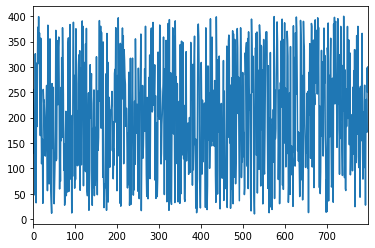

In [9]:
df['pred1'].plot()

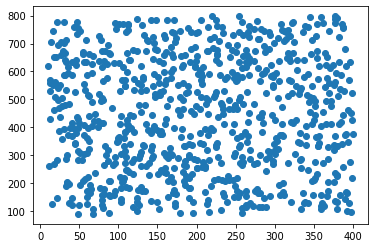

In [10]:
plt.scatter(df.pred1, df.pred2)

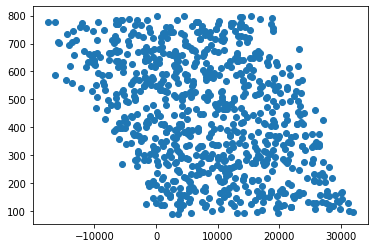

In [11]:
plt.scatter(df.response, df.pred2)

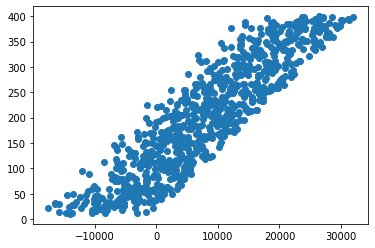

In [12]:
plt.scatter(df.response, df.pred1)

## Data looks normal

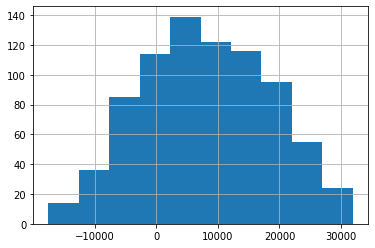

In [13]:
df.response.hist()

## No correlation between the pred1 & pred2

In [14]:
df.corr()

,response,pred1,pred2
response,1.000000,0.902087,-0.394782
pred1,0.902087,1.000000,0.011559
pred2,-0.394782,0.011559,1.000000


In [16]:
x_train = df[['pred1', 'pred2']]
y_train = df['response']

## Box Cox transformation didn't work

In [7]:
train_data, fitted_lambda = stats.boxcox(x_train['pred2'])

In [17]:
train_data

array([ 93.41197164, 205.54952469, 154.5063701 ,  96.85033954,
       203.18953059, 101.43937051, 125.24590513, 184.5639653 ,
        60.91642874, 147.43064492,  85.13314702, 169.73238991,
        45.60670003,  78.64556752, 178.63824889,  59.83287688,
       117.31346612, 101.42817111, 111.15525982, 104.95197635,
        69.77720285,  45.38068909, 170.4112205 , 143.56457324,
       109.87775767, 167.68645626, 155.09370572, 140.00698811,
        66.07778793,  52.87751742, 200.20454563, 122.69978958,
       173.75280605, 196.46358122, 178.28374475, 196.83226426,
       173.92101168,  93.33649399,  83.2518792 ,  60.44062463,
       108.76519338, 183.74588965, 161.0007587 , 177.65136723,
        89.90500249, 168.09375265,  81.34738815,  58.11434754,
        93.54747247,  67.79106262, 168.14460012, 168.98198502,
       131.47327815, 139.30946116, 128.17408236, 110.46844437,
        82.62059105, 190.06792679,  94.29668749, 209.10097675,
       117.65266103,  48.39320096,  98.7473542 ,  65.48

In [10]:
x_train['pred2'] = train_data

In [11]:
x_train

,pred1,pred2
0,255.275882,93.411972
1,130.393494,205.549525
2,189.511588,154.506370
3,119.904180,96.850340
4,47.731504,203.189531
5,325.788148,101.439371
6,73.403294,125.245905
7,32.205664,184.563965
8,307.193698,60.916429
9,182.405873,147.430645


In [30]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.9779777828770401

In [34]:
reg.intercept_

57.19779135502358

In [45]:
reg_coeff = pd.DataFrame(reg.coef_,x_train.columns, columns = ['Coefficient'])
reg_coeff

,Coefficient
pred1,84.900947
pred2,-20.889171


In [77]:
x_train_ = sm.add_constant(x_train)

In [18]:
model = sm.OLS(y_train, x_train).fit()

## kurtosis more and errors are not normally distributed

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               response   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.852e+04
Date:                Sat, 05 Oct 2019   Prob (F-statistic):                        0.00
Time:                        15:02:16   Log-Likelihood:                         -7005.5
No. Observations:                 800   AIC:                                  1.402e+04
Df Residuals:                     798   BIC:                                  1.402e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pred1         85.0031      0.394    215.498      0.000      84.229      85.777
pred2        -20.8211      0.187   -111.385      0.000     -21.188     -20.454
==============================================================================
Omnibus:                       34.126   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.304
Skew:                          -0.190   Prob(JB):                     2.21e-18
Kurtosis:                       4.515   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## useless constant

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.770e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:32:03   Log-Likelihood:                -7005.4
No. Observations:                 800   AIC:                         1.402e+04
Df Residuals:                     797   BIC:                         1.403e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1978    164.748      0.347      0.729    -266.194     380.590
pred1         84.9009      0.492    172.491      0.000      83.935      85.867
pred2        -20.8892      0.271    -77.092      0.000     -21.421     -20.357
==============================================================================
Omnibus:                       33.104   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.843
Skew:                          -0.171   Prob(JB):                     4.60e-18
Kurtosis:                       4.509   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Hetrosecasdidiajsfajld

In [115]:
model.model.exog[:,1]

array([274.56908394, 765.19195123, 527.58398657, 287.72049011,
       753.75736773, 305.49779376, 401.57147093, 664.98357949,
       158.20358352, 496.37235868, 243.51889939, 596.24146026,
       109.21610175, 219.82372051, 637.30519457, 154.5987568 ,
       368.87192712, 305.45410173, 343.95067933, 319.2742596 ,
       188.39955139, 108.52628034, 599.34843879, 479.51224531,
       338.83323032, 586.90062285, 530.19500095, 464.12098483,
       175.64051537, 131.94377932, 739.35353516, 391.00392883,
       614.69846258, 721.3956916 , 635.65825562, 723.16081546,
       615.47357325, 274.28203859, 236.58860373, 156.6182155 ,
       334.39141534, 661.14582471, 556.62393852, 632.72290531,
       261.30799309, 588.75736005, 229.62162039, 148.92233251,
       275.08457961, 181.52301381, 588.98925575, 592.81136661,
       427.6966581 , 461.11732143, 413.80700666, 341.19714877,
       234.27374955, 690.94014393, 277.93901723, 782.47614993,
       370.25656197, 117.80520726, 295.03850641, 173.62

In [117]:
model.resid

0       118.763539
1      1415.114260
2       296.780705
3       972.870299
4       292.763430
          ...     
795    -126.625017
796     565.617502
797    -502.516093
798     494.017978
799    -636.922231
Length: 800, dtype: float64

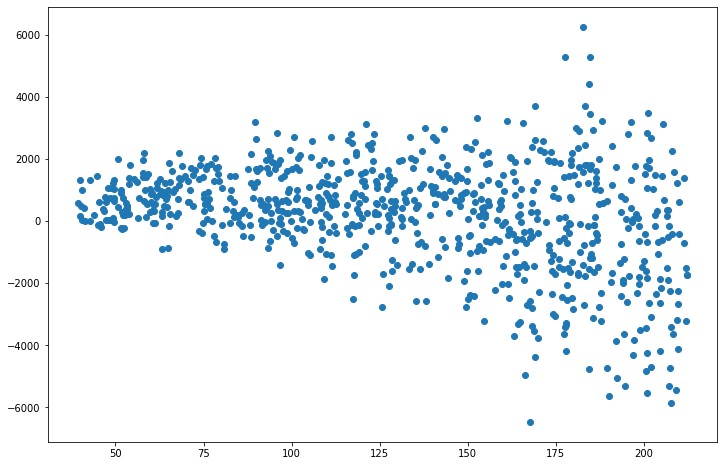

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(model.model.exog[:,1], model.resid)
plt.show()

In [111]:
model.params

pred1    85.003058
pred2   -20.821101
dtype: float64

## Mean shifted

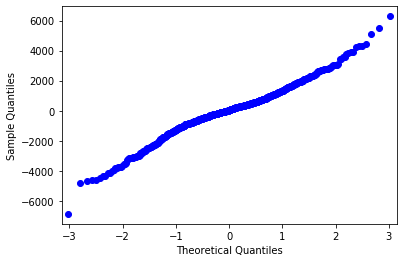

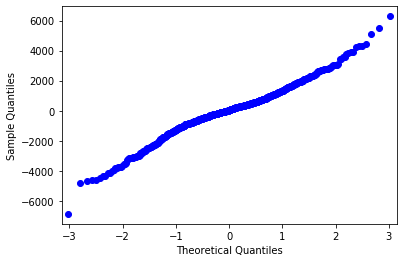

In [108]:
qqplot()

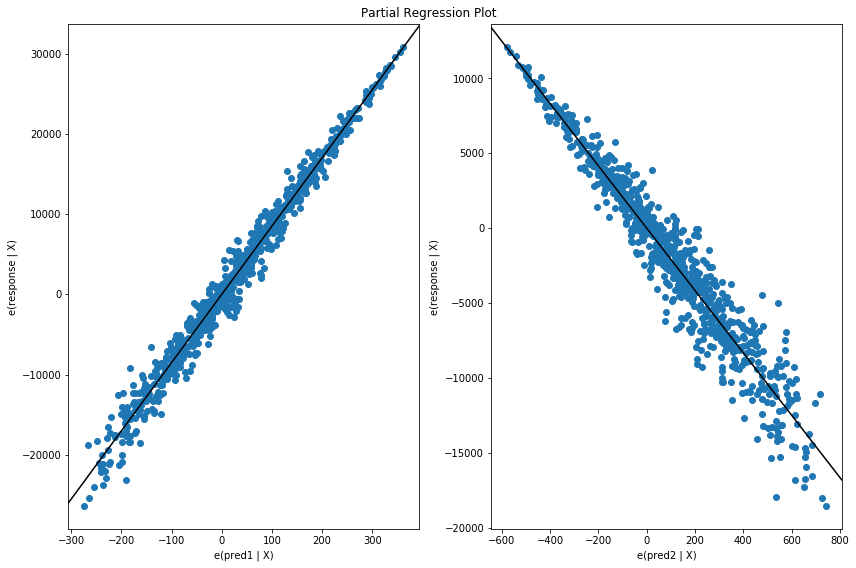

In [85]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

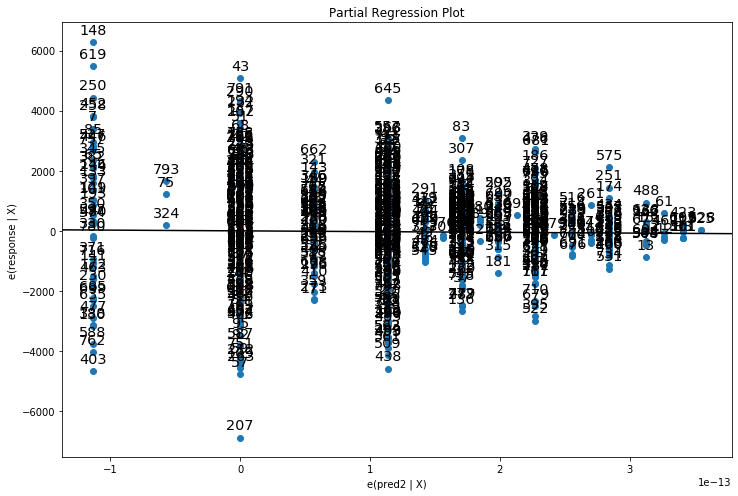

In [95]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("response", "pred2", ["pred2", "pred1"], data=df, ax=ax)

## hetro

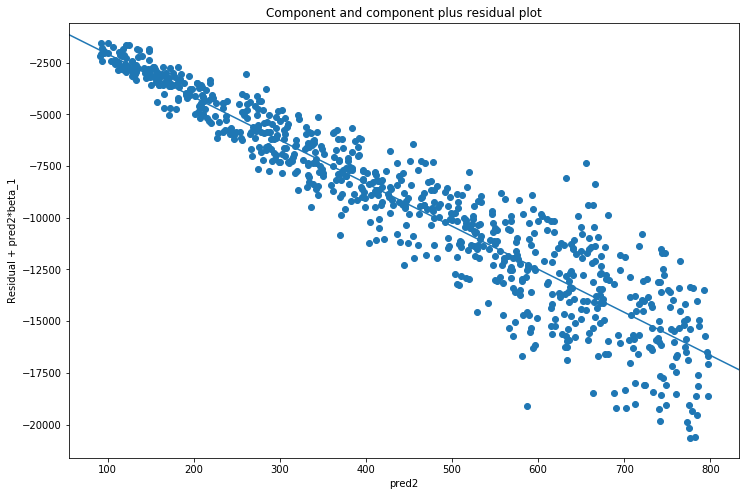

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(model, "pred2", ax=ax)

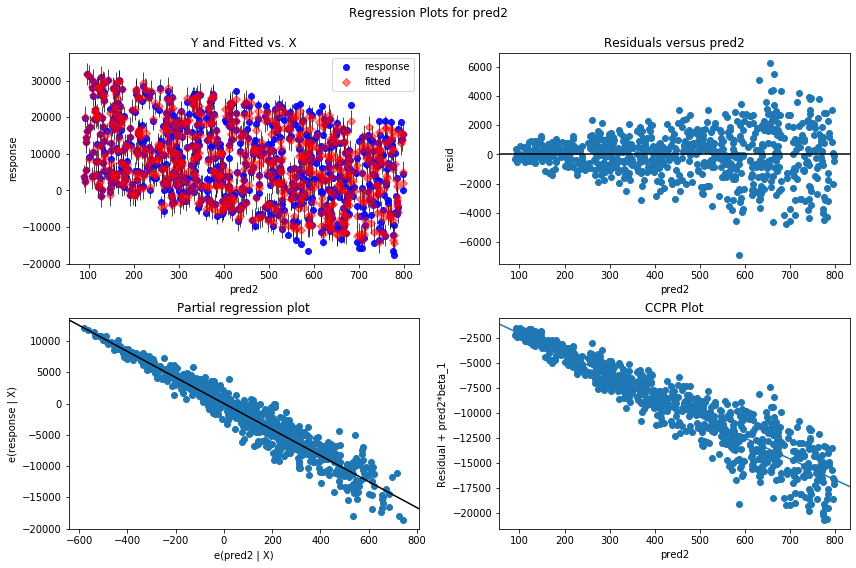

In [122]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "pred2", fig=fig)

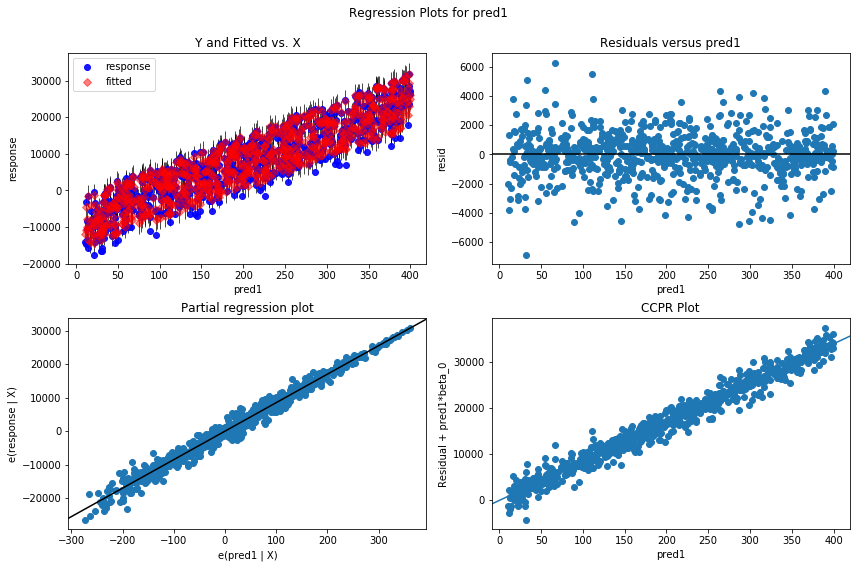

In [123]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "pred1", fig=fig)

In [2]:
x_train_ = sm.add_constant(x_train)

NameError: name 'data' is not defined

In [18]:
df = sm.add_constant(df)

/anaconda3/envs/fraud_detection/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## REmove constant

In [43]:
pred_train = sm.add_constant(pred_train)

In [35]:
pred_train = df['pred2']

In [38]:
pred2_a = sm.OLS(model.resid, pred_train).fit()
pred2_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05566
Date:                Sat, 05 Oct 2019   Prob (F-statistic):              0.814
Time:                        15:45:52   Log-Likelihood:                -7005.5
No. Observations:                 800   AIC:                         1.401e+04
Df Residuals:                     798   BIC:                         1.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5070    132.022      0.239      0.811    -227.644     290.658
pred2         -0.0639      0.271     -0.236      0.814      -0.595       0.468
==============================================================================
Omnibus:                       33.030   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.840
Skew:                          -0.169   Prob(JB):                     4.60e-18
Kurtosis:                       4.510   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pred_train = df['pred2']**2

In [44]:
model = sm.OLS(model.resid, pred_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06922
Date:                Sat, 05 Oct 2019   Prob (F-statistic):              0.793
Time:                        15:46:24   Log-Likelihood:                -7005.5
No. Observations:                 800   AIC:                         1.401e+04
Df Residuals:                     798   BIC:                         1.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8868     89.696      0.244      0.807    -154.181     197.955
pred2      -7.891e-05      0.000     -0.263      0.793      -0.001       0.001
==============================================================================
Omnibus:                       32.903   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.678
Skew:                          -0.166   Prob(JB):                     4.99e-18
Kurtosis:                       4.510   Cond. No.                     4.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
pred_train = df['pred2']**(1/2)

In [33]:
model = sm.OLS(model.resid, pred_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.01567
Date:                Sat, 05 Oct 2019   Prob (F-statistic):                       0.900
Time:                        15:45:26   Log-Likelihood:                         -7005.5
No. Observations:                 800   AIC:                                  1.401e+04
Df Residuals:                     799   BIC:                                  1.402e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pred2          0.3231      2.581      0.125      0.900      -4.743       5.389
==============================================================================
Omnibus:                       34.034   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.185
Skew:                          -0.188   Prob(JB):                     2.35e-18
Kurtosis:                       4.515   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df['response'] = df['response']/df['pred2']

In [26]:
model = sm.OLS(df['response'], df[['const', 'pred1', 'pred2']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     996.0
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          1.65e-217
Time:                        23:30:08   Log-Likelihood:                -3772.5
No. Observations:                 800   AIC:                             7551.
Df Residuals:                     797   BIC:                             7565.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6776      2.896     16.120      0.000      40.994      52.362
pred1          0.2672      0.009     30.886      0.000       0.250       0.284
pred2         -0.1551      0.005    -32.575      0.000      -0.164      -0.146
==============================================================================
Omnibus:                      438.474   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3429.965
Skew:                           2.397   Prob(JB):                         0.00
Kurtosis:                      11.940   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

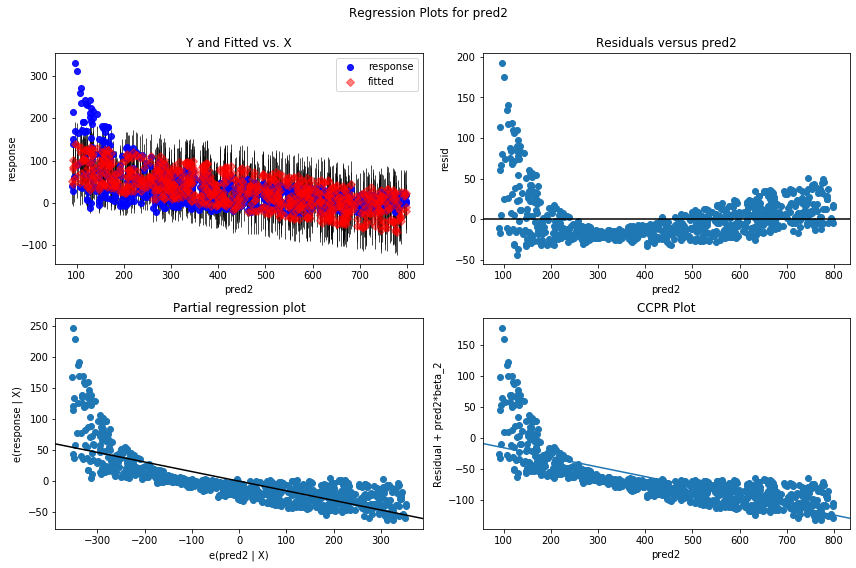

In [27]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "pred2", fig=fig)